In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [4]:
open('SpotifyFeatures.csv')

<_io.TextIOWrapper name='SpotifyFeatures.csv' mode='r' encoding='UTF-8'>

In [9]:
trackdata = pd.read_csv("SpotifyFeatures.csv")

In [10]:
trackdata.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


In [11]:
#To check the columns and their statistical features
trackdata.describe().T 


,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [12]:
trackdata.groupby("genre").popularity.mean().sort_values(ascending = False).head()

genre
Pop        66.590667
Rap        60.533795
Rock       59.619392
Hip-Hop    58.423131
Dance      57.275256
Name: popularity, dtype: float64

In [13]:
#In the last snippet of code, we have checked the Popularity Mean for each genre. 
#We've done this to see if the impact of dropping duplicates isn't a lot.

trackdata.drop_duplicates(subset = ["track_id"],inplace = True)

In [14]:
#Popularity Mean after dropping duplicates
trackdata.groupby("genre").popularity.mean().sort_values(ascending = False).head()

genre
Pop        67.064957
Rap        59.515797
Rock       58.767849
Hip-Hop    58.516660
Dance      57.351541
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Genre vs Popularity')

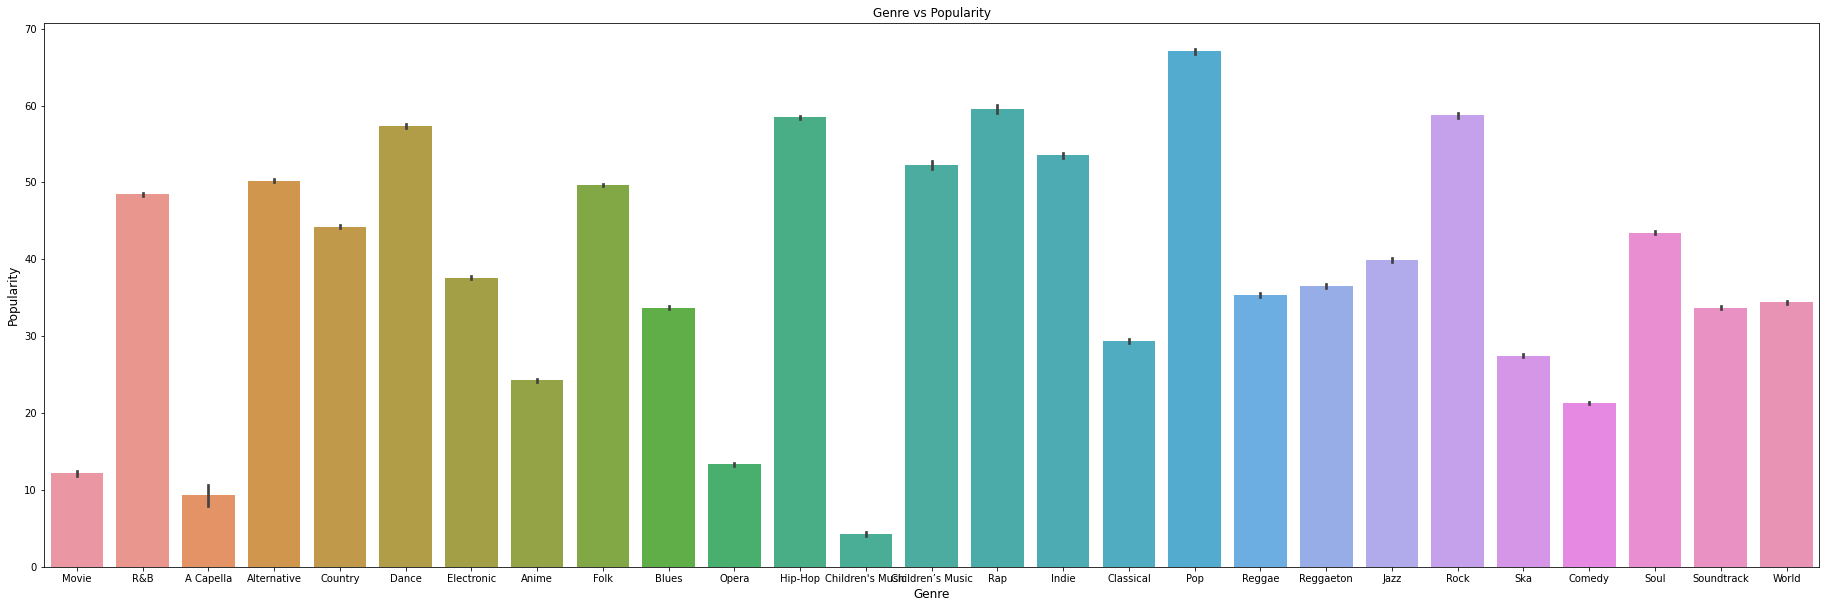

In [25]:
#Plotting Popularity Means with different Genres. Now we'll select the top 6 genres and move forward.

plt.figure(figsize =(70,10))

ax1 = plt.subplot(1,2,1)
sns.barplot(x = trackdata["genre"], y=trackdata["popularity"])
plt.xlabel("Genre",fontsize = 12)
plt.ylabel("Popularity",fontsize = 12)
plt.title("Genre vs Popularity")


In [27]:
populargenres = trackdata.loc[trackdata.genre.isin(["Pop","Dance","Hip-Hop","Rap","Rock","Dance"])]
populargenres

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9028,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,97,0.2970,0.752,201661,0.488,0.000009,F#,0.0936,-7.050,Major,0.0705,136.041,4/4,0.533
9029,Dance,Ariana Grande,needy,1TEL6MlSSVLSdhOSddidlJ,92,0.7800,0.647,171573,0.309,0.000007,G,0.2020,-7.948,Minor,0.0366,87.045,4/4,0.195
9030,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,91,0.4510,0.747,182000,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,4/4,0.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226488,Rock,Fleetwood Mac,Little Lies,08o75xMKmGrKny6GsXrNJW,60,0.1240,0.630,218040,0.688,0.000048,D,0.1580,-9.816,Major,0.0266,124.825,4/4,0.893
226493,Rock,The Doors,Five To One,5FlBGGwGuqYmqr0qeBWrxe,56,0.2030,0.615,264960,0.401,0.000000,E,0.0860,-14.070,Minor,0.0507,87.959,4/4,0.672
226497,Rock,Black Sabbath,The Wizard - Remastered Version,6sjTzevtstOxOMsFsypsEm,50,0.0335,0.394,262747,0.682,0.000231,A,0.3070,-11.972,Major,0.1110,100.646,4/4,0.361
226501,Rock,The Beatles,I'm Happy Just To Dance With You - Remastered ...,0gd50I2gKioJ59C827EdAY,58,0.1380,0.658,116373,0.537,0.000000,F#,0.0572,-7.535,Minor,0.0307,132.115,4/4,0.887


/Users/sarthakkhanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sarthakkhanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sarthakkhanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

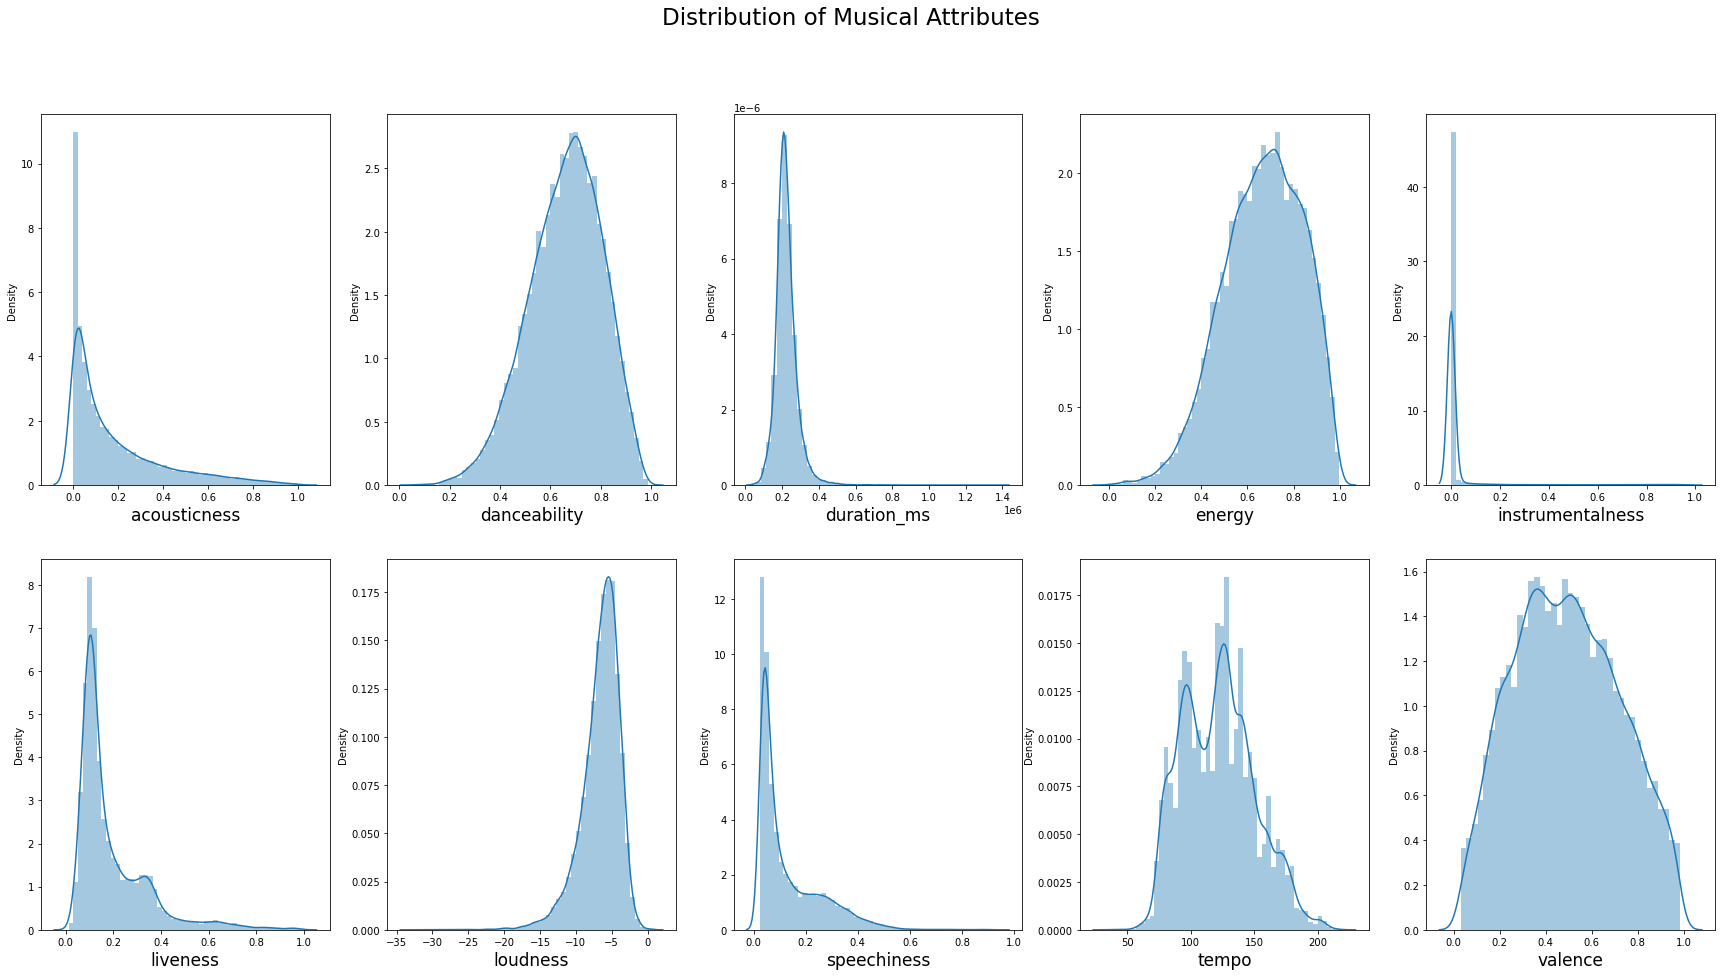

In [35]:
plt.figure(figsize=(30,15))
pltnum = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if pltnum<=10:
        ax = plt.subplot(2,5, pltnum)
        sns.distplot(a =populargenres[col])
        plt.xlabel(col,fontsize = 17)
    pltnum +=1
plt.suptitle("Distribution of Musical Attributes",fontsize = 23)
plt.show()

Text(0.5, 1.0, 'Correlation between features')

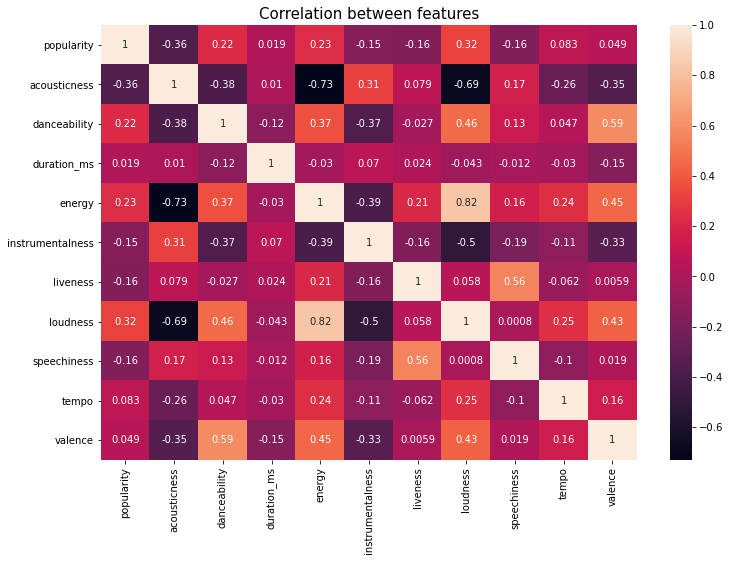

In [36]:
# As it can be seen - the attributes Danceability, Energy, Valence and Loudness show a somewhat normal distribution. 
# It would be better to base the analysis on these four attributes.

#Next we will check the correlation between features with Popularity. 
#It will give a quantitative result as to what are the most impacting attributes for popularity. 

plt.figure(figsize = (12, 8))

sns.heatmap(trackdata.corr(), annot=True )
plt.title("Correlation between features", fontsize = 15)

In [41]:
#From the above correlation matrix we can see Popularity has a positive correlation with Danceability (0.22),  Energy (0.23) and Loudness(0.32). 
#Our interpretation is therefore - songs with high danceability (mostly Pop & Dance songs) tend to have higher Popularity,
# and Energy (again, something common with Pop & Dance songs) are to be preferred by the Music company.

#But before we finalize our analysis - we should circle back to check the Mean values of the attributes for each genre.
#This would help us further filter the genres. 

trackdata.groupby("genre").popularity.mean().sort_values(ascending = False).head()

genre
Pop        67.064957
Rap        59.515797
Rock       58.767849
Hip-Hop    58.516660
Dance      57.351541
Name: popularity, dtype: float64

In [48]:
populargenres.groupby("genre").danceability.mean().sort_values(ascending = False).head(10)

genre
Hip-Hop    0.727641
Rap        0.703869
Dance      0.641974
Pop        0.605097
Rock       0.520476
Name: danceability, dtype: float64

In [49]:
populargenres.groupby("genre").energy.mean().sort_values(ascending = False).head(10)

genre
Dance      0.696151
Rock       0.674699
Pop        0.660160
Hip-Hop    0.645527
Rap        0.617395
Name: energy, dtype: float64

In [50]:
populargenres.groupby("genre").loudness.mean().sort_values(ascending = False).head(10)

genre
Dance     -6.020553
Pop       -6.179367
Hip-Hop   -6.794658
Rap       -7.300888
Rock      -7.844345
Name: loudness, dtype: float64

In [1]:
#Although Pop and Dance are low on Danceability as compared to Hip-Hop & Rap , 
#but due to Energy and Loudness goes a long way in effecting popularity. 